In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import csv
%matplotlib inline

--------------------------------------------------------------------------
[[27784,1],0]: A high-performance Open MPI point-to-point messaging module
was unable to find any relevant network interfaces:

Module: OpenFabrics (openib)
  Host: compute201902

Another transport will be used instead, although this may result in
lower performance.

NOTE: You can disable this warning by setting the MCA parameter
btl_base_warn_component_unused to 0.
--------------------------------------------------------------------------


In [2]:
data_dir='/home/m962g264/wsu_Nova_Vertexer/output/csv_files/'

In [3]:
csv_file=data_dir+'z_modelPred_RHC_abdul.csv'
#csv_file=data_dir +'z_modelPred_FHC_abdul.csv'

In [4]:
vertex_summary=pd.read_csv(csv_file,header=None)
vertex_summary.columns=['True Z','Model Predictions','Reco Z']

In [5]:
vertex_summary.columns

Index(['True Z', 'Model Predictions', 'Reco Z'], dtype='object')

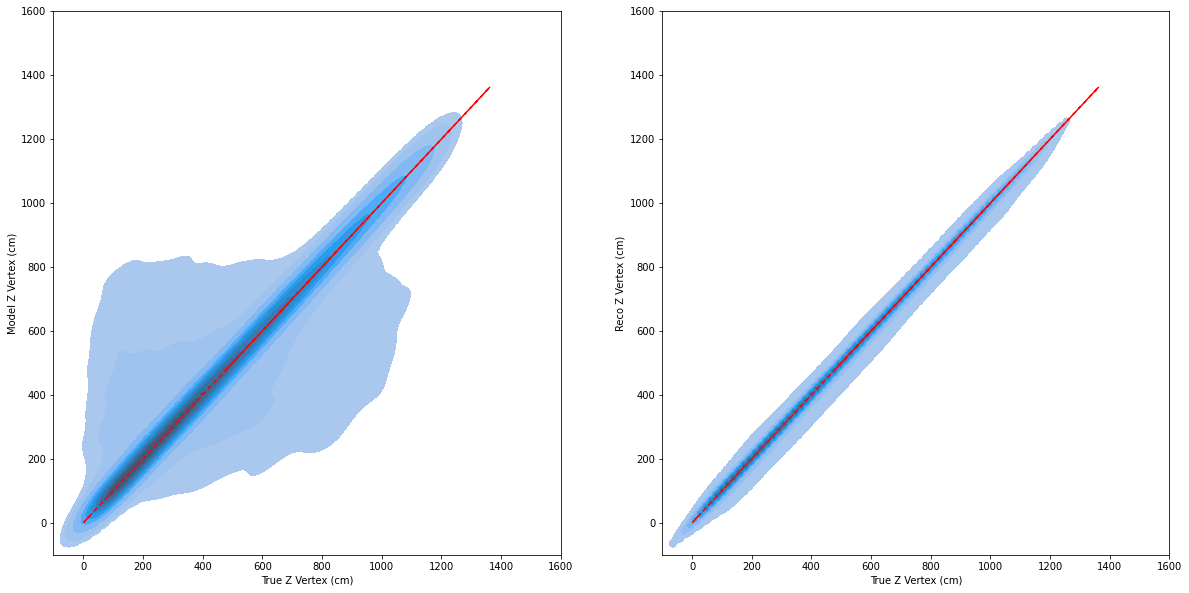

In [6]:
#full
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
true_vertex=vertex_summary['True Z']
#reco_vertex=vertex_summary['Reco X']
#[:len(vertex_summary)]
sns.kdeplot(data=vertex_summary, x='True Z', y='Model Predictions', fill=True,ax=ax[0])
sns.kdeplot(data=vertex_summary, x='True Z', y='Reco Z',fill=True,ax=ax[1])

ax[0].set(xlabel='True Z Vertex (cm)',ylabel='Model Z Vertex (cm)')
ax[1].set(xlabel='True Z Vertex (cm)',ylabel='Reco Z Vertex (cm)')

ax[0].set_ylim(-100,1600)
ax[0].set_xlim(-100,1600)

ax[1].set_ylim(-100,1600)
ax[1].set_xlim(-100,1600)

ax[0].plot(true_vertex,true_vertex,'r',lw=1.5,ls='--')
ax[1].plot(true_vertex,true_vertex,'r',lw=1.5,ls='--')
plt.savefig('/home/m962g264/wsu_Nova_Vertexer/output/plots/diff_plots/z-modelpred-true-vs-reco-kde.pdf')
plt.savefig('/home/m962g264/wsu_Nova_Vertexer/output/plots/diff_plots/z-modelpred-true-vs-reco-kde.png',dpi=600)

prediction-true difference
Standard Reco-true difference
vertex distribution summary
Stats from prediction-true difference
The mean is -4.676158140889717
The RMS is  180.76976518531197
Stats from Standard Reco-true difference
The mean is -0.7191120507087233
The RMS is  40.54137585217091


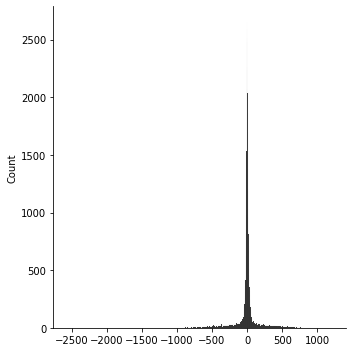

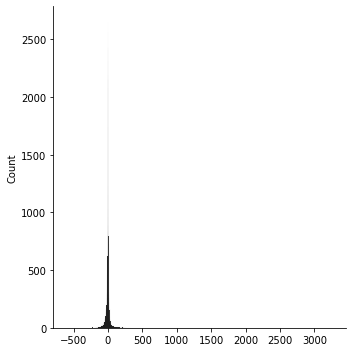

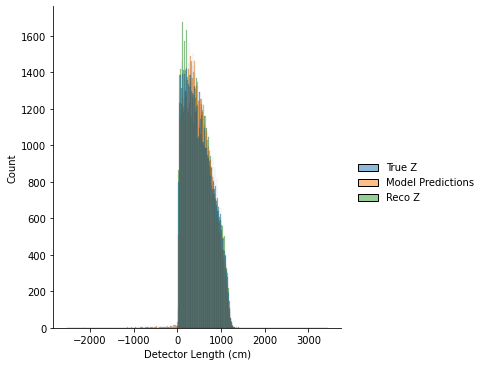

In [7]:
# Spread comparison between reconstruction methods
#diff_reco=reco_qe[:len(reco_qe)]

#Switch to model predictions (new data) by uncommenting below
diff_reco_minus_true=vertex_summary['Reco Z']-vertex_summary['True Z']
diff_pred_minus_true=vertex_summary['Model Predictions']-vertex_summary['True Z']

#plt.figure(figsize=(12,8))
print("prediction-true difference")
sns.displot(diff_pred_minus_true,color='k')
print("Standard Reco-true difference")
sns.displot(diff_reco_minus_true,color='k')
print("vertex distribution summary")
sns.displot(vertex_summary)

#plt.ylim(0, 1000)
#plt.xlim(-6000, 6000)

plt.xlabel('Detector Length (cm)')
plt.ylabel('Count')

#calculating mean and stuff
print("Stats from prediction-true difference")
print("The mean is" , np.mean(diff_pred_minus_true))
#Calculating STD
print("The RMS is " , np.std(diff_pred_minus_true))

#calculating mean and stuff
print("Stats from Standard Reco-true difference")
print("The mean is" , np.mean(diff_reco_minus_true))
#Calculating STD
print("The RMS is " , np.std(diff_reco_minus_true))
#print(averagex)
#print(rmsx)
#reco_qe.keys()
plt.savefig('/home/m962g264/wsu_Nova_Vertexer/output/plots/diff_plots/z-full-Vertexing-diff-kde.pdf')
plt.savefig('/home/m962g264/wsu_Nova_Vertexer/output/plots/diff_plots/z-full-Vertexing-diff-vs-reco-kde.png',dpi=600)